In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('datasets/houseprice.txt', delimiter=',')

In [3]:
X = data[:, 0]
print(X)
Y = data[:, 1].reshape(X.size, 1)
print(Y)

[2600. 3000. 3200. 3600. 4000. 1500. 1700. 1750. 1800. 1820. 1920. 1450.
 1590. 1596. 1623. 1878. 1658. 1720. 1985. 2000. 2100. 2050. 1990. 1965.
 1970. 2120. 2200. 2156. 1269. 1489. 1785. 1965. 1948. 2008. 2079. 2116.
 2230. 2200. 2220. 2365. 2325. 2396. 2489. 2420. 2398. 2350. 2375. 2236.
 2347. 2459.]
[[550000.]
 [565000.]
 [610000.]
 [680000.]
 [725000.]
 [158900.]
 [169850.]
 [178950.]
 [178650.]
 [180000.]
 [186850.]
 [150000.]
 [149870.]
 [158620.]
 [159990.]
 [189680.]
 [168980.]
 [170000.]
 [190000.]
 [198510.]
 [200000.]
 [193580.]
 [200000.]
 [195180.]
 [198680.]
 [201650.]
 [220000.]
 [216510.]
 [138550.]
 [149850.]
 [179850.]
 [196280.]
 [195680.]
 [200000.]
 [205880.]
 [210000.]
 [220000.]
 [219850.]
 [222000.]
 [235680.]
 [239580.]
 [240000.]
 [248850.]
 [245590.]
 [240000.]
 [236840.]
 [230000.]
 [226260.]
 [220590.]
 [239840.]]


In [4]:
print(X.shape)
print(Y.shape)

(50,)
(50, 1)


In [5]:
X = np.vstack((np.ones((X.size, )), X)).T

In [6]:
print(X.shape)
print(Y.shape)

(50, 2)
(50, 1)


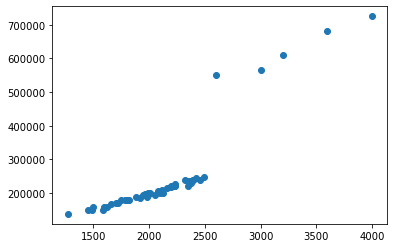

In [7]:
plt.scatter(X[:, 1], Y)
plt.show()

In [8]:
def model(X, Y, lr, epochs):
    m = Y.size
    w = np.zeros((2,1))
    cost_list = []

    for i in range(epochs):
        y_pred = np.dot(X, w)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))

        d_w = (1/m) * np.dot(X.T, y_pred - Y)
        w = w - lr*d_w
        #d_b = (1/m * np.sum(y_pred - Y))
        #b = w-lr*d_b
        
        cost_list.append(cost)
        
    return w, cost_list

In [9]:
epochs = 100
lr = 0.00000001
w, cost_list = model(X, Y, lr, epochs)

In [10]:
new_houses = np.array([[1, 1547], [1, 1896], [1, 1934], [1,
2800], [1, 3400], [1, 5000]])
for house in new_houses :
    print("Our model predicts the price of house with",
    house[1], "sq. ft. area as : $", np.round(np.dot(house, w)[0],
    2))

Our model predicts the price of house with 1547 sq. ft. area as : $ 184473.4
Our model predicts the price of house with 1896 sq. ft. area as : $ 226090.21
Our model predicts the price of house with 1934 sq. ft. area as : $ 230621.55
Our model predicts the price of house with 2800 sq. ft. area as : $ 333888.47
Our model predicts the price of house with 3400 sq. ft. area as : $ 405435.99
Our model predicts the price of house with 5000 sq. ft. area as : $ 596229.38


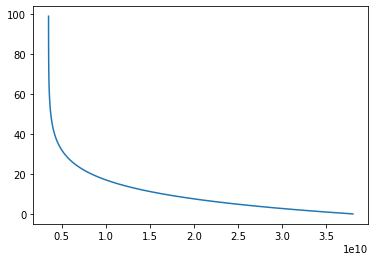

In [11]:
rng = np.arange(0, epochs)
plt.plot(cost_list, rng)
plt.show()